<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #5 - Projectile Motion I


**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

## Introduction

In this lab, you will develop a model for the two-dimensional motion of a projectile with air resistance. The model will make use of Euler's equations for the x and y components of the motion. The drag force (due to air resistance) is given by:

$$F_{drag}=\frac{1}{2}\times{}C\times{}\rho{}_{air}\times{}A\times{}v^{2}$$

where C is the drag coefficient, $\rho{}_{air}$ is the air density, and A is the cross-sectional area of the ball.

The equations of motion are:

$x_{n+1}=x_{n}+v_{x,n}\times{}\Delta{}t$

$y_{n+1}=y_{n}+v_{y,n}\times{}\Delta{}t$

$v_{n}=\sqrt{v_{x,n}^{2}+v_{y,n}^{2}}$

$v_{x,n+1}=v_{x,n}-\frac{B}{m}\times{}v_{n}\times{}v_{x,n}\times{}\Delta{}t$

$v_{y,n+1}=v_{y,n}-\frac{B}{m}\times{}v_{n}\times{}v_{y,n}\times{}\Delta{}t$

where $B = \frac{1}{2}C\times{}\rho{}\times{}A$

## **Activity I** - Model for 2-d Motion with Air Resistance

Using equations (2-6) above, write Python code that will produce a trajectory for a given initial height, initial velocity, and initial launch angle.


Programming tips:
1. Start with your code from Lab #5
2. You will need to store x and y coordinates so you can plot them at the end of the program. You can do this by declaring two empty lists:
```
xpoints = []
ypoints = []
```
Every time you want to add a value to the list, use:
```
xpoints.append(x)
ypoints.append(y)
```

In [15]:
from math import cos, sin, tan, pi

# Initial Functions
cx_area = lambda r: pi*r**2 # Cross-sectional area
get_B = lambda C,ρ,A: (C*ρ*A)/2 # Get B

# Constants and Initial Conditions
g = 9.8 #m/s²
dt = 1/60 #s
ρ = 1.02 #kg/m³
C = 0.48
r = 0.02294/2 #m
A = cx_area(r)
B = get_B(C,ρ,A)
m = 0.0002 #kg

# Functions to use with model
x_np1 = lambda xn,vxn: xn+vxn*dt
y_np1 = lambda yn,vyn: yn+vyn*dt - 0.5*g*dt**2
get_v_n = lambda v_xn,v_yn: ((v_xn**2)+(v_yn**2))**0.5
v_xnp1 = lambda v_xn,v_n: v_xn - (B/m)*v_n*v_xn*dt
v_ynp1 = lambda v_yn,v_n: v_yn - (B/m)*v_n*v_yn*dt - g*dt
v_xi = lambda v_i,θ_i: v_i*cos(pi*θ_i/180)
v_yi = lambda v_i,θ_i: v_i*sin(pi*θ_i/180)

def predictive_model(y_i,v_i,θ_i):
  x_points = [0]
  y_points = [y_i]

  v_n = v_i
  v_x = v_xi(v_n,θ_i)
  v_y = v_yi(v_n,θ_i)
  
  while y_points[-1] > 0:
    x_points.append(x_np1(x_points[-1],v_x))
    y_points.append(y_np1(y_points[-1],v_y))

    v_n = get_v_n(v_x,v_y)
    v_y = v_ynp1(v_y,v_n)
    v_x = v_xnp1(v_x,v_n)
  
  return x_points, y_points

## **Activity II** - Video of 2-d Motion

Using a smart phone, take a video of the projectile motion. **Make sure that you have a meter stick in the video for your scale.** (Having a proper scale is critical.) Also, try to avoid distortion by capturing the video at a location at the mid-point of the trajectory. Load the video on Logger Pro and determine the trajectory (y vs. x) of the motion (see the instructions on pg. 3 for the movie capture). Copy and paste the x and y data into an Excel file and save it as a .txt file "projectile.txt". Do not include headings in your columns. Then upload the file to Jupyter Notebook.

Make a plot of your trajectory from the video analysis. Show the location of the Styrofoam ball as individual data points rather than a solid line. You can use the following code to make the plot:

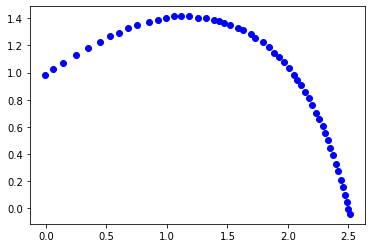

In [64]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Import video analysis data and plot the data
x_act = [-0.00500305727775, 0.0580789692678, 0.142229771182, 0.245015148754, 0.348960655549, 0.449363624893, 0.532219639727, 0.606882241918, 0.679514617966, 0.756290312671, 0.851275892872, 0.929947155866, 0.988492248482, 1.06162182277, 1.11819883902, 1.17918848964, 1.25494907128, 1.32174972632, 1.38610582336, 1.42669998789, 1.46932437857, 1.51787371493, 1.58444648744, 1.63002299266, 1.69366436722, 1.73208328947, 1.79263789163, 1.84139439393, 1.88658764217, 1.92664317529, 1.96826281119, 2.00525228849, 2.04888143395, 2.07754284075, 2.10571740762, 2.14086310813, 2.17151330788, 2.20164559281, 2.23067989829, 2.25615094974, 2.28654219209, 2.30734165174, 2.32958091463, 2.35242095872, 2.37219494701, 2.39587401313, 2.41217797204, 2.43965853304, 2.45442946404, 2.4687653466, 2.48580474457, 2.49719887088, 2.51201123508]
y_act = [0.981609133804, 1.02295286718, 1.07073085572, 1.13083596093, 1.18270563599, 1.22720402845, 1.26752744304, 1.2937329774, 1.32814270765, 1.34809098091, 1.37043387989, 1.3831045733, 1.4043022165, 1.41361002251, 1.41425553031, 1.41343302843, 1.4033964233, 1.40409398818, 1.38417694916, 1.37876301278, 1.36717510665, 1.34994421298, 1.32736185144, 1.3118904871, 1.28498738787, 1.25782400323, 1.22384114104, 1.18438187398, 1.14750463812, 1.11457332896, 1.07463513676, 1.03385361985, 0.980786631928, 0.946751712658, 0.905616207605, 0.853444601472, 0.810351750188, 0.761969899518, 0.703811729121, 0.66089587191, 0.60598606334, 0.558541240121, 0.502590289939, 0.446233294529, 0.394009631315, 0.326106375437, 0.274267934619, 0.206937306628, 0.160481567939, 0.102188049132, 0.0484963762462, -0.00705894012343, -0.0400839520283]
plt.plot(x_act,y_act,'bo')

plt.show()

## **Activity III** - Fit Model to Data

Combine the graphs from Activities I and II into one graph. Adjust the initial velocity and the drag coefficient until there is a good fit between the model and the experimental data. Make sure that you use the same origin and initial location for the Styrofoam ball.

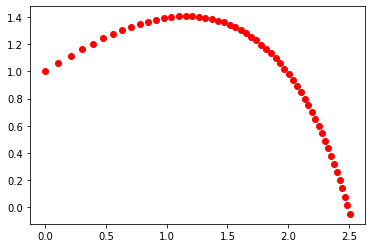

In [65]:
x_mod,y_mod = predictive_model(1,7.4,30)
plt.plot(x_mod,y_mod,'ro')
plt.show()

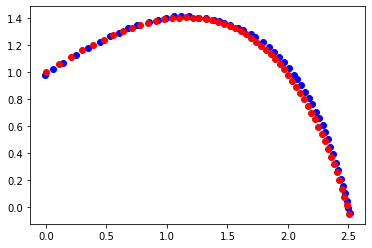

In [66]:
plt.plot(x_act,y_act,'bo')
plt.plot(x_mod,y_mod,'ro')
plt.show()

## **Activity IV** - Testing the Model

Use the model from Activity I with the values of initial velocity and drag coefficient from Activity III to predict the trajectory of the Styrofoam ball. The instructor will give you an initial height and initial angle. Using the third setting on the projectile launcher, you will need to predict the height of the projectile when $x = \frac{1}{2}R$ where R is the range of motion. A 10 cm hoop will be placed at the value of x and y that you specify. **You will have two shots!**

Don't fire your Styrofoam ball until the instructor or the teaching assistant is there to observe.

The points for this section are as follows:
* Ball goes through the hoop on the first try: 25 pts
* Ball goes through the hoop on the second try: 20 pts
* Ball doesn't go through the hoop both tries: 15 pts

In [51]:
from IPython.display import Markdown

header = "| Time (s) | x (m) | y (m) |\n|:-|-:|-:|\n"

x_pred,y_pred = predictive_model(1.131,7.4,33)

body = '\n'.join([*map(lambda t:f"|{t/60:0.3f}|{x_pred[t]:0.3f}|{y_pred[t]:0.3f}|",range(len(y_pred)))])

Markdown(header + body)

| Time (s) | x (m) | y (m) |
|:-|-:|-:|
|0.000|0.000|1.131|
|0.017|0.103|1.197|
|0.033|0.200|1.256|
|0.050|0.292|1.308|
|0.067|0.378|1.355|
|0.083|0.460|1.397|
|0.100|0.539|1.435|
|0.117|0.614|1.467|
|0.133|0.685|1.496|
|0.150|0.754|1.521|
|0.167|0.820|1.542|
|0.183|0.884|1.559|
|0.200|0.946|1.573|
|0.217|1.006|1.584|
|0.233|1.064|1.592|
|0.250|1.120|1.597|
|0.267|1.175|1.599|
|0.283|1.228|1.598|
|0.300|1.280|1.594|
|0.317|1.330|1.588|
|0.333|1.379|1.579|
|0.350|1.427|1.568|
|0.367|1.474|1.554|
|0.383|1.519|1.537|
|0.400|1.564|1.519|
|0.417|1.607|1.498|
|0.433|1.649|1.474|
|0.450|1.690|1.449|
|0.467|1.731|1.421|
|0.483|1.770|1.392|
|0.500|1.808|1.360|
|0.517|1.846|1.327|
|0.533|1.882|1.291|
|0.550|1.918|1.254|
|0.567|1.952|1.214|
|0.583|1.986|1.173|
|0.600|2.019|1.131|
|0.617|2.051|1.086|
|0.633|2.082|1.041|
|0.650|2.112|0.993|
|0.667|2.142|0.945|
|0.683|2.170|0.894|
|0.700|2.198|0.843|
|0.717|2.225|0.790|
|0.733|2.251|0.736|
|0.750|2.276|0.681|
|0.767|2.301|0.625|
|0.783|2.325|0.568|
|0.800|2.348|0.509|
|0.817|2.370|0.450|
|0.833|2.392|0.390|
|0.850|2.413|0.329|
|0.867|2.433|0.267|
|0.883|2.453|0.204|
|0.900|2.472|0.141|
|0.917|2.491|0.077|
|0.933|2.508|0.013|
|0.950|2.526|-0.053|

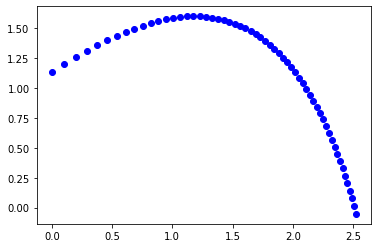

In [52]:
plt.plot(x_pred,y_pred,'bo')

plt.show()

In [70]:
R = 2.51
x = R/2
y = 1.595

print(f"x: {x}\ny: {y}")

x: 1.255
y: 1.595


The ball went through the hoop the first try, so we get 25/25 pts!

### Logger Pro Movie Capture

*Tips*
1. Make sure there is a meter stick in the field of view when the ball is fired.

*Logger Pro Procedure*
1. Use Insert>Movie to input the video clip.
2. Click on "Enable/Disable Video Analysis" which is located in the bottom right hand corner of the video window.
3. Click on "Set Scale". Then click and drag on the image of the meter stick.
4. "Set Origin" to a position on the ground directly below where the ball is launched.
5. Make sure that the video clip is set to the frame just before the ball starts moving. Click on "Add Point" and then click on the ball. The video will advance one frame at a time.